<a href="https://colab.research.google.com/github/PuliLahari/lahari/blob/master/housesales1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as ny
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/PuliLahari/lahari/master/kc_house_data.csv')
data=data.drop(['waterfront','view','sqft_above','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','date'] , axis=1)
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,0,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,400,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,0,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,910,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,0,1987
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,3,11,1530,2001
6,1321400060,257500.0,3,2.25,1715,6819,2.0,3,7,0,1995
7,2008000270,291850.0,3,1.50,1060,9711,1.0,3,7,0,1963
8,2414600126,229500.0,3,1.00,1780,7470,1.0,3,7,730,1960
9,3793500160,323000.0,3,2.50,1890,6560,2.0,3,7,0,2003


In [36]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
bathrooms        0.525138
sqft_basement    0.323816
bedrooms         0.308350
floors           0.256794
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
id              -0.016762
Name: price, dtype: float64

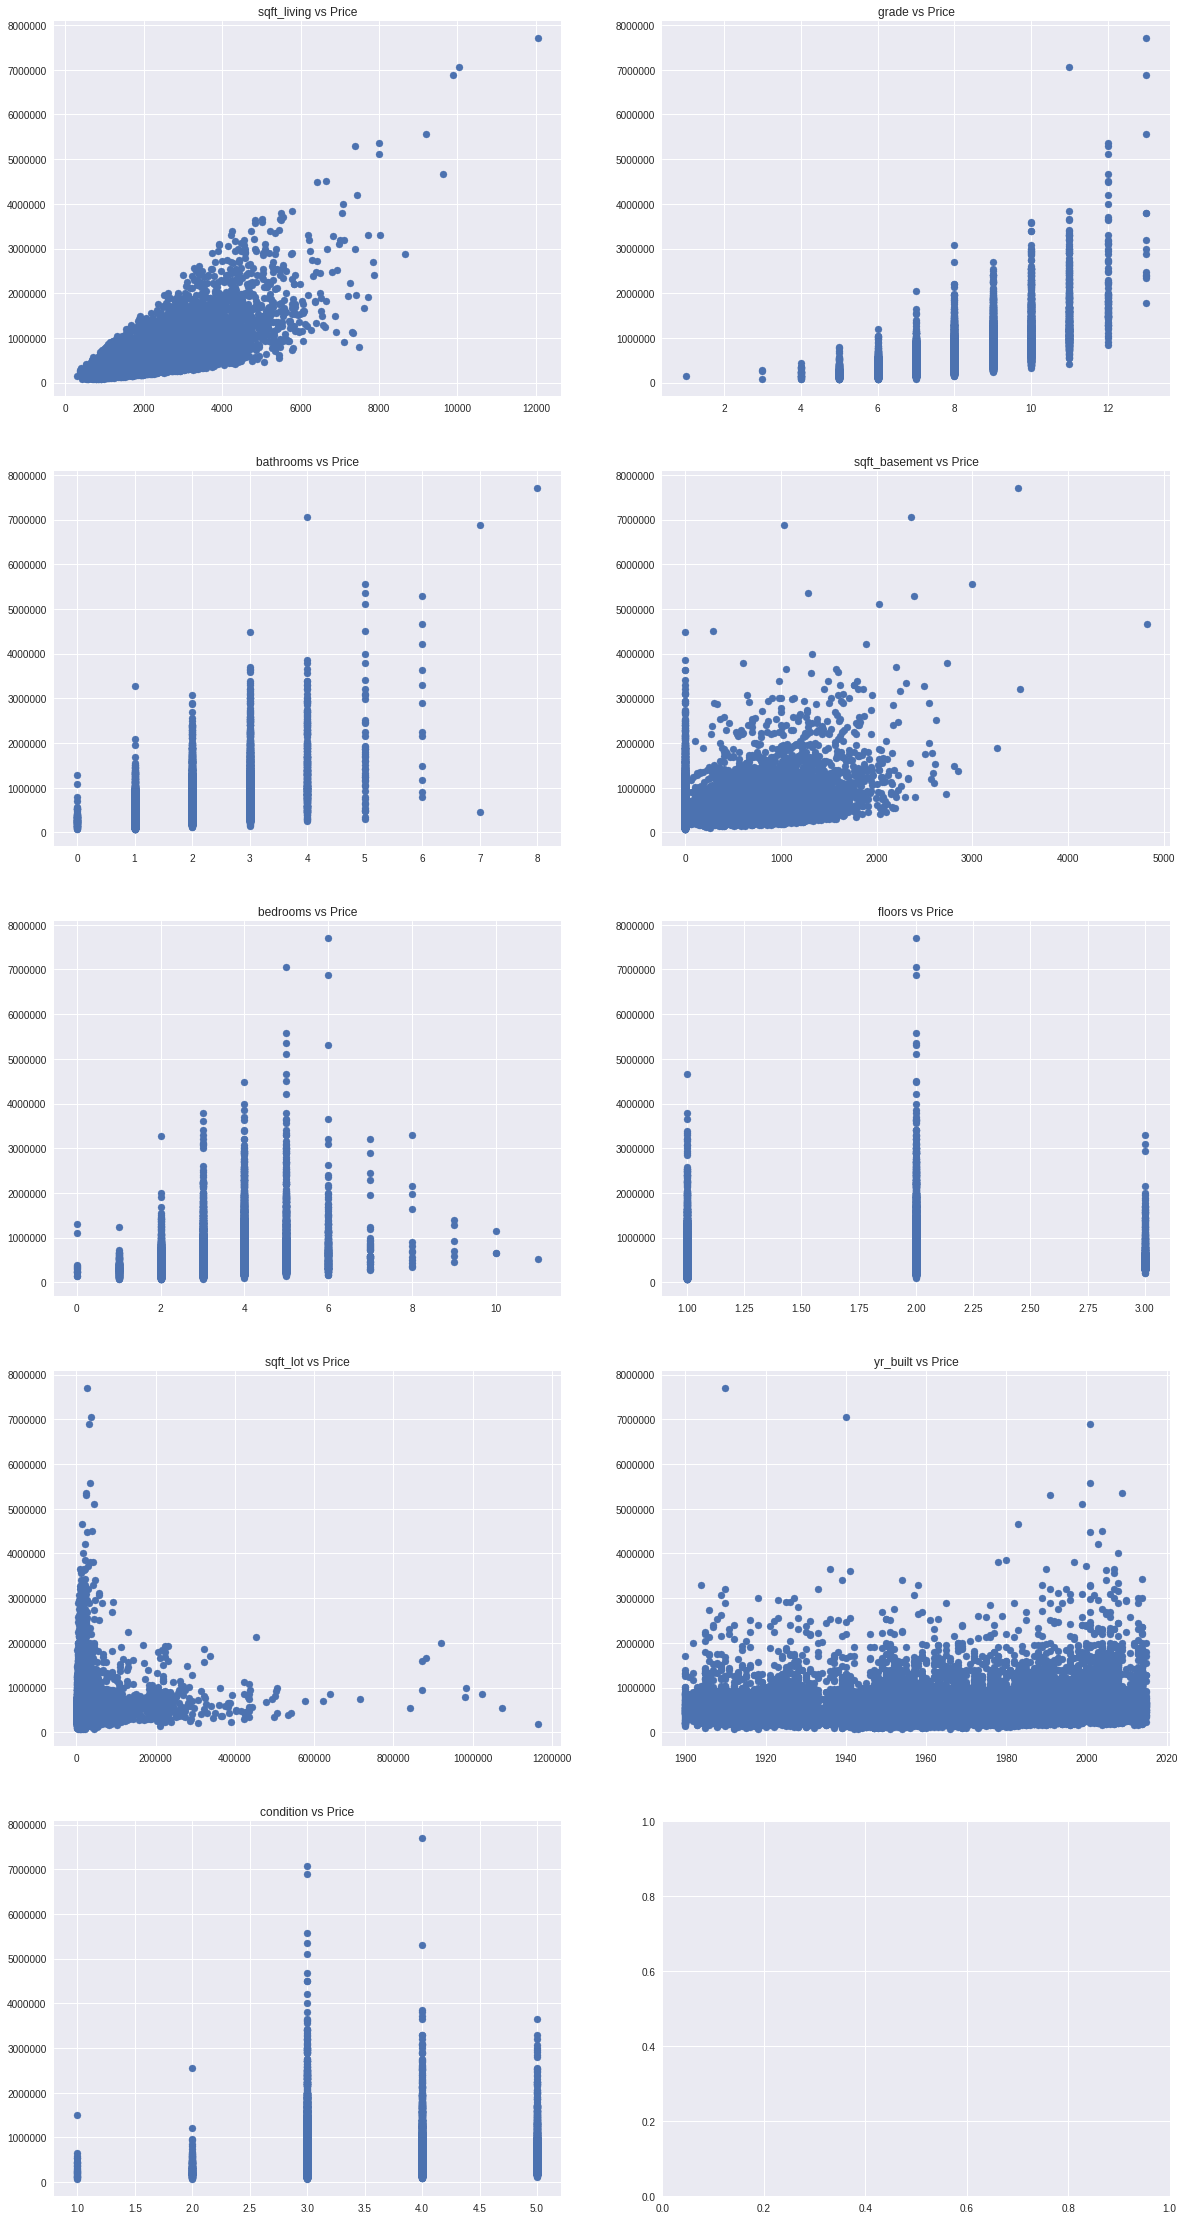

In [74]:
cols=['sqft_living','grade','bathrooms','sqft_basement','bedrooms','floors','sqft_lot',
     'yr_built','condition']

fig,axi=plt.subplots(5,2,figsize=(20,40))
indx=0
leng=len(cols)
for ax in axi:
    for a in ax:
        if leng>indx:
            a.scatter(x= cols[indx],y='price',data=data)
            a.set_title('{} vs Price'.format(cols[indx]))
            indx +=1
plt.show()

In [0]:
data.loc[(data['sqft_living']>12000) & (data['price']<3000000)]
data=data.drop(data.loc[(data['sqft_living']>12000) & (data['price']<3000000)].index)
data.loc[(data['bedrooms']>30) & (data['price']<2000000)]
data=data.drop(data.loc[(data['bedrooms']>30) & (data['price']<2000000)].index)
data.loc[(data['sqft_lot']>1500000) & (data['price']<2000000)]
data=data.drop(data.loc[(data['sqft_lot']>1500000) & (data['price']<2000000)].index)

In [50]:
y=data.price
X=data.drop(['price'],axis=1)
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,0,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,400,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,0,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,910,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,0,1987
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,3,11,1530,2001
6,1321400060,257500.0,3,2.25,1715,6819,2.0,3,7,0,1995
7,2008000270,291850.0,3,1.50,1060,9711,1.0,3,7,0,1963
8,2414600126,229500.0,3,1.00,1780,7470,1.0,3,7,730,1960
9,3793500160,323000.0,3,2.50,1890,6560,2.0,3,7,0,2003


In [73]:
data.bathrooms = data.bathrooms.astype(int)
data.floors=data.floors.astype(int)
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built
0,7129300520,221900.0,3,1,1180,5650,1,3,7,0,1955
1,6414100192,538000.0,3,2,2570,7242,2,3,7,400,1951
2,5631500400,180000.0,2,1,770,10000,1,3,6,0,1933
3,2487200875,604000.0,4,3,1960,5000,1,5,7,910,1965
4,1954400510,510000.0,3,2,1680,8080,1,3,8,0,1987
5,7237550310,1225000.0,4,4,5420,101930,1,3,11,1530,2001
6,1321400060,257500.0,3,2,1715,6819,2,3,7,0,1995
7,2008000270,291850.0,3,1,1060,9711,1,3,7,0,1963
8,2414600126,229500.0,3,1,1780,7470,1,3,7,730,1960
9,3793500160,323000.0,3,2,1890,6560,2,3,7,0,2003


In [76]:
y=data.price
X=data.drop(['price'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)

reg=XGBRegressor(n_estimators=500,learning_rate=.2)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print(mean_absolute_error(y_test,pred))

119501.06487791387
